In [1]:
#   BIG DATA SCIENCE ASSIGNMENT3 
# Author : Nathalie Uwamahoro
# Puporse of the assignment: Comparing result from satllite image and survey that estimate multidimension poverty index.

In [2]:
# Imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
from sklearn.linear_model import RidgeCV, Lasso, LassoCV,ElasticNetCV
from regressors import stats 
from stepwise_regression import stepwise_regression
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
import xlwt 
from xlwt import Workbook 



In [3]:
# QUESTION 6  : ANALYZE THE DATA 
#  To Analyze data, I am using python to load data.

# 6.a LOAD MPIAssignment data by using  excell read 
MPIdata = pd.read_excel('MPIAssignment.xlsx')
MPIdata.head(5)


,FID,Prov_ID,Province,Dist_ID,District,Sect_ID,Sector,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity,mpi
0,0,1,Kigali City,11,Nyarugenge,1101,Gitega,101.297202,30758,0.064,0.412,0.027
1,1,1,Kigali City,11,Nyarugenge,1102,Kanyinya,85.060422,19802,0.282,0.445,0.126
2,2,1,Kigali City,11,Nyarugenge,1103,Kigali,133.991142,26452,0.212,0.434,0.092
3,3,1,Kigali City,11,Nyarugenge,1104,Kimisagara,161.933015,62266,0.081,0.409,0.033
4,4,1,Kigali City,11,Nyarugenge,1105,Mageregere,49.415699,23144,0.369,0.430,0.159


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

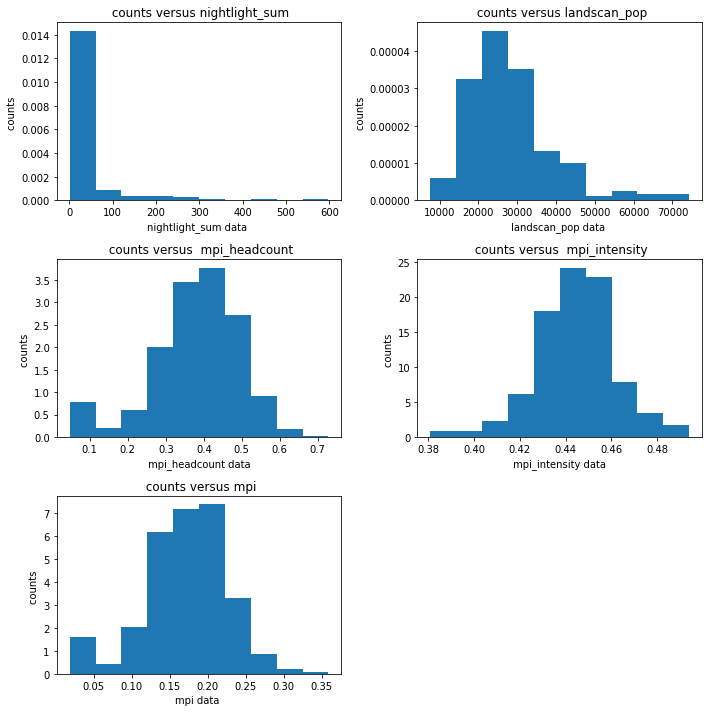

In [4]:

# 6.b. plotting histogram 
# Accessing only Variables and dependent variables needed
MPIdataXy = MPIdata.loc["0":"415","nightlight_sum":"mpi"]
MPIdataXy.head(5)

plt.figure(figsize= (10,10))
Varnames =['nightlight_sum','landscan_pop',' mpi_headcount',' mpi_intensity', 'mpi']
for i in range(0,5):
   
    plt.subplot(3,2,i+1) 
    plt.hist(MPIdataXy.iloc[:,i], normed = True)
    plt.title(" counts versus "+ Varnames[i])
    plt.ylabel("counts ")
    plt.xlabel(Varnames[i]+ " data ")
    plt.tight_layout()
   


In [5]:

MPIdataXy.head(5)
x = MPIdataXy[['nightlight_sum','landscan_pop','mpi_headcount','mpi_intensity']]

yvars =MPIdataXy[['mpi']]
yvars.head(5)

,mpi
0,0.027
1,0.126
2,0.092
3,0.033
4,0.159


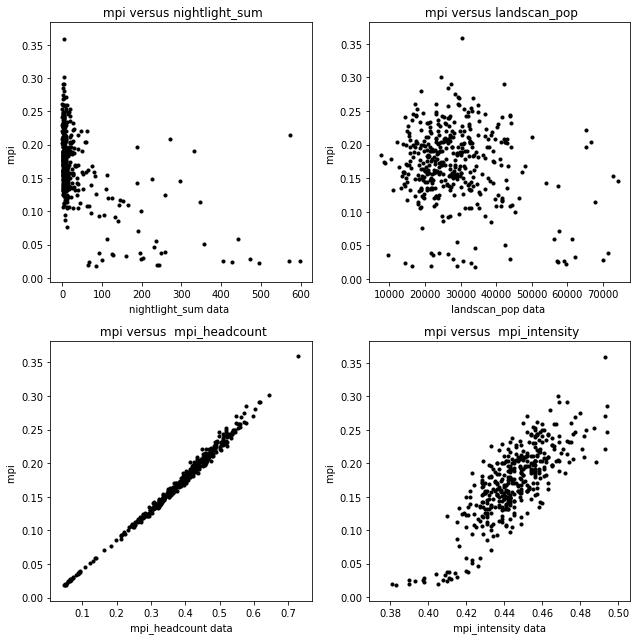

In [6]:
# 6.c Creation of scatter plot of the dependent variable against each features
plt.figure(figsize= (9,9))
# names
Varnames = ['nightlight_sum','landscan_pop',' mpi_headcount',' mpi_intensity']
Yvariable =  MPIdataXy[['mpi']]
Explanavars = MPIdataXy[['nightlight_sum','landscan_pop','mpi_headcount','mpi_intensity']]
colors = (0,0,0)
area = np.pi*3
for i in range(0,4):
   
    plt.subplot(2,2,i+1) 
    plt.scatter(Explanavars.iloc[:,i], Yvariable, s=area, c=colors)
    plt.title(" mpi versus "+ Varnames[i])
    plt.ylabel("mpi ")
    plt.xlabel(Varnames[i]+ " data ")
    plt.tight_layout()

In [7]:
# QUESTION 6 CONT....
# CALCULATION OF CORRELATION FOR EACH FEATURES AND MPI

# case1: i : X against y 
XYcorr_Data = MPIdataXy.corr(method='spearman')
XYcorr_Data

,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity,mpi
nightlight_sum,1.000000,0.447506,-0.470580,-0.196437,-0.449116
landscan_pop,0.447506,1.000000,-0.050481,0.070575,-0.035350
mpi_headcount,-0.470580,-0.050481,1.000000,0.690300,0.994479
mpi_intensity,-0.196437,0.070575,0.690300,1.000000,0.754426
mpi,-0.449116,-0.035350,0.994479,0.754426,1.000000


In [8]:
# case ii : log x and y \
# Getting only x variables 
#Explanavars.head(4)
# Logarith of these variables 
Log_Explanars = np.log10(Explanavars)
Log_Explanars.head(4)

# concantinating log x and y variables
# Concantinating 
Logx_y_data = pd.concat([Log_Explanars, Yvariable],axis=1)#,names=['nightlight_sum','landscan_pop',' mpi_headcount',' mpi_intensity','mpi'])
Logx_y_data.head(5)

# correlation between log x and y 
Logx_yCorr_data = Logx_y_data.corr(method='spearman')
Logx_yCorr_data 

,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity,mpi
nightlight_sum,1.000000,0.447506,-0.470580,-0.196437,-0.449116
landscan_pop,0.447506,1.000000,-0.050481,0.070575,-0.035350
mpi_headcount,-0.470580,-0.050481,1.000000,0.690300,0.994479
mpi_intensity,-0.196437,0.070575,0.690300,1.000000,0.754426
mpi,-0.449116,-0.035350,0.994479,0.754426,1.000000


In [9]:
# Case iii: x and log y 
Logy_data = np.log10(Yvariable)
Logy_data.head(5)

# concantinating x ang log y into one data frame
Xlogy_data = pd.concat([Explanavars, Logy_data],axis=1)
# correlation between x and log y
xlogYcorr_data = Xlogy_data.corr(method='spearman')
xlogYcorr_data

,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity,mpi
nightlight_sum,1.000000,0.447506,-0.470580,-0.196437,-0.449116
landscan_pop,0.447506,1.000000,-0.050481,0.070575,-0.035350
mpi_headcount,-0.470580,-0.050481,1.000000,0.690300,0.994479
mpi_intensity,-0.196437,0.070575,0.690300,1.000000,0.754426
mpi,-0.449116,-0.035350,0.994479,0.754426,1.000000


In [10]:
#case iv : log x and log y 
logx_logy = np.log10(MPIdataXy)
logx_logy.head(4)
# correlation between log x and log y 
Logx_logY = logx_logy.corr(method='spearman')
Logx_logY

,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity,mpi
nightlight_sum,1.000000,0.447506,-0.470580,-0.196437,-0.449116
landscan_pop,0.447506,1.000000,-0.050481,0.070575,-0.035350
mpi_headcount,-0.470580,-0.050481,1.000000,0.690300,0.994479
mpi_intensity,-0.196437,0.070575,0.690300,1.000000,0.754426
mpi,-0.449116,-0.035350,0.994479,0.754426,1.000000


In [11]:
# QUESTION 7 
# cREATION OF DATA : nightlight_per_capita and population_density

# Loading Table created from arcgis

rw_nightlight_2015_07_data =pd.read_excel('rw_nightlight_2015_07.xls')
rw_nightlight_2015_07_data.head(5)

# cacluation of nightlight_per_capita
# nightlight_per_capita = nightlight_sum / landscan_pop
MPIdataXy['nightlight_per_capita'] = MPIdataXy.nightlight_sum / MPIdataXy.landscan_pop
MPIdataXy.head(5)
nightlight_per_capita_data = MPIdataXy[['nightlight_per_capita']]
nightlight_per_capita_data.head(3)

# calculation of population density 
MPIdataXy['population_density']= MPIdataXy.landscan_pop / rw_nightlight_2015_07_data.AREA
MPIdataXy.head(3)
population_density_Data = MPIdataXy.drop(MPIdataXy.columns[0:6],axis=1)
population_density_Data.head(3)
 #Variables_Insample.drop(Variables_Insample.columns[0:15],axis=1)
#Recreated_data = MPIdataXy[['nightlight_per_capita','population_density']] 

,population_density
0,3.556028e+08
1,1.040623e+07
2,1.116131e+07


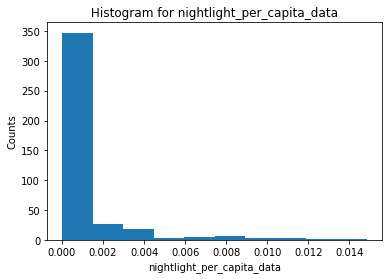

In [12]:
# Plotting histogram for nightlight_per_capita
plt.hist(MPIdataXy['nightlight_per_capita'])

plt.xlabel('nightlight_per_capita_data')
plt.ylabel('Counts')
plt.title(' Histogram for nightlight_per_capita_data ')
plt.show()

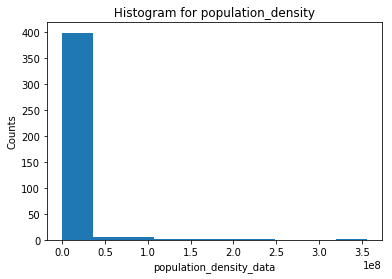

In [13]:
# Plotting histogram for population density
plt.hist(MPIdataXy['population_density'])

plt.xlabel('population_density_data')
plt.ylabel('Counts')
plt.title(' Histogram for population_density ')
plt.show()

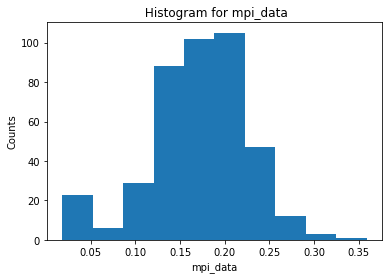

In [14]:
# Histogram for mpi as dependent variable
plt.hist(MPIdataXy['mpi'])

plt.xlabel('mpi_data')
plt.ylabel('Counts')
plt.title(' Histogram for mpi_data')
plt.show()

In [15]:
# Recreated variable 
# concantinating the recreated variables
RecreatedExplanaVars = pd.concat([nightlight_per_capita_data , population_density_Data],axis=1)
RecreatedExplanaVars.head(3)
# Concating the recreated variables and dependent variable to find the correlaion betwen them ]
Xy_Data = pd.concat([RecreatedExplanaVars , Yvariable],axis=1)
# case 1: 
Corrxy_data =Xy_Data.corr()
Corrxy_data

,nightlight_per_capita,population_density,mpi
nightlight_per_capita,1.000000,0.370426,-0.546978
population_density,0.370426,1.000000,-0.487136
mpi,-0.546978,-0.487136,1.000000


In [16]:
# case 2 Log x and y 
LogxData = np.log10(RecreatedExplanaVars)
Logx_y_data = pd.concat([LogxData , Yvariable],axis=1)
CorrLogxY_data = Logx_y_data.corr()    
CorrLogxY_data                

,nightlight_per_capita,population_density,mpi
nightlight_per_capita,1.000000,0.431585,-0.605358
population_density,0.431585,1.000000,-0.617437
mpi,-0.605358,-0.617437,1.000000


In [17]:
# Case 3 : x vs log y 

LogY_data =np.log10(Yvariable)
Logy_x_data = pd.concat([RecreatedExplanaVars,LogY_data],axis=1)
Logy_x_dataCorr =Logy_x_data.corr()
Logy_x_dataCorr

,nightlight_per_capita,population_density,mpi
nightlight_per_capita,1.000000,0.370426,-0.660497
population_density,0.370426,1.000000,-0.668281
mpi,-0.660497,-0.668281,1.000000


In [18]:
# case 4 : log x and logy 
LogxLogy_data = np.log10(Xy_Data)
#CorrLogxLogy = LogxLogy_data.corr()
#CorrLogxLogy
LogxLogy_data.head(3)

,nightlight_per_capita,population_density,mpi
0,-2.482361,8.550965,-1.568636
1,-2.366982,7.017293,-0.899629
2,-2.295382,7.047715,-1.036212


In [19]:
# QUESTION 8 :
# THE following variable which are highly correlated are going to be used
# For : nightlight_per_capita .I have selected  nightlight_per_capita from case3: x vs logy 
# For population_density. I choose population_density from case 4 : log x and log y because the data were higly correlated with mpi
nightlight_per_capita_Data2 =Logy_x_data[['nightlight_per_capita']]
nightlight_per_capita_Data2.head(3)

# For population density


population_density2 = LogxLogy_data.drop(['nightlight_per_capita','mpi'], axis=1)
population_density2.head(3)
#df2.loc["California","2013"]
# concanting the selected variables to use to build different model 
SelectedExplanarVars = pd.concat([nightlight_per_capita_Data2,population_density2],axis=1)

SelectedExplanarVars.head(3)

,nightlight_per_capita,population_density
0,0.003293,8.550965
1,0.004296,7.017293
2,0.005065,7.047715


In [20]:
SelectedExplanarVars = pd.DataFrame({'population_density':np.log10(Xy_Data.population_density),
                                     'nightlight_per_capita':Logy_x_data['nightlight_per_capita']})
y = Yvariable.mpi

In [33]:
# Performing backwise stepwise 
SelectVars = stepwise_regression.backward_regression(SelectedExplanarVars,y,threshold_out=0.05)

regressor_OLS = sm.OLS(endog = y, exog = SelectedExplanarVars[SelectVars]).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpi   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2335.
Date:                Fri, 03 May 2019   Prob (F-statistic):          3.34e-226
Time:                        03:20:16   Log-Likelihood:                 646.74
No. Observations:                 416   AIC:                            -1289.
Df Residuals:                     414   BIC:                            -1281.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
population_density        0.0270      0.000     65.676      0.000       0.026       0.028
nightlight_per_capita   -14.8427      1.127    -13.174      0.000     -17.057     -12.628
==============================================================================
Omnibus:                       57.811   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.472
Skew:                           0.536   Prob(JB):                     1.48e-50
Kurtosis:                       6.477   Cond. No.                     3.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# Performing ridge regression
alphas = np.linspace(.05, 0.01, 1)
ridgecData = RidgeCV(alphas = alphas, cv =5, normalize = True)
Model = ridgecData.fit(SelectedExplanarVars,y)

print(stats.coef_pval(Model,SelectedExplanarVars,y))
stats.summary(Model,SelectedExplanarVars,y)
# since p values are zero the selected features are significant

[0.00000000e+00 0.00000000e+00 2.22044605e-16]
Residuals:
Min      1Q  Median      3Q   Max
-0.1576 -0.0234  0.0038  0.0273  0.11


Coefficients:
            Estimate  Std. Error  t value  p value
_intercept  0.695287    0.040234  17.2809      0.0
x1         -0.075213    0.001129 -66.6161      0.0
x2         -8.377467    0.958284  -8.7422      0.0
---
R-squared:  0.48113,    Adjusted R-squared:  0.47861
F-statistic: 191.48 on 2 features


In [34]:
# Elastic Net CV 
regr = ElasticNetCV(cv=5, random_state=0)

ModelElastic= regr.fit(SelectedExplanarVars,y)
print(stats.coef_pval(ModelElastic,SelectedExplanarVars,y))
# Printing the summary of the  Elastic model to display the p values 
stats.summary(ModelElastic,SelectedExplanarVars,y)


[0.         0.         0.12257377]
Residuals:
Min      1Q  Median      3Q   Max
-0.1569 -0.0252  0.0037  0.0301  0.11


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  0.845178    0.042734  19.7776  0.000000
x1         -0.098164    0.001199 -81.8579  0.000000
x2         -1.574787    1.017821  -1.5472  0.122574
---
R-squared:  0.41465,    Adjusted R-squared:  0.41181
F-statistic: 146.28 on 2 features


In [37]:
# QUESTUION 9 

# USING LASSO CROSS VALIDATION 
# cALCULATION of log of Mpi
y = Yvariable.mpi
LogYVar_data = np.log10(y)
LogYVar_data.head(4)

# Using Lasso with cross validation to estimate MPI(log yhat)

# Building model with LAsso 

#alphas = np.linspace(.05, 0.01, 1)
LassoscData = LassoCV( cv =10, normalize = True)
ModelLassoData = LassoscData.fit(SelectedExplanarVars,LogYVar_data)
# Predicting for each sectors 
LogMPiPredicted = ModelLassoData.predict(SelectedExplanarVars)

#LogMPiPredicted
#9.b  Calculation of correlation betwen log yhat and log y

np.corrcoef(LogMPiPredicted, LogYVar_data)

#array([[1.        , 0.83792371],
  #     [0.83792371, 1.        ]])
# Calculation for R -squared 


array([[1.        , 0.83792371],
       [0.83792371, 1.        ]])

In [26]:
# 9.c : Calculation of R-squared 
stats.summary(ModelLassoData,SelectedExplanarVars,LogYVar_data)
# R-squared:  0.70212,

Residuals:
Min      1Q  Median      3Q     Max
-0.3708 -0.0692 -0.0035  0.0688  0.3883


Coefficients:
             Estimate  Std. Error   t value  p value
_intercept   1.729900    0.117304   14.7472      0.0
x1          -0.363459    0.003292 -110.4148      0.0
x2         -39.931976    2.793889  -14.2926      0.0
---
R-squared:  0.70212,    Adjusted R-squared:  0.70067
F-statistic: 486.72 on 2 features


In [27]:
Ybar_MPI = np.sum(LogYVar_data)/len(LogYVar_data) 
#numpy.sum((yhat-ybar)**2)
ssregT = np.sum((LogMPiPredicted-Ybar_MPI)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot= np.sum((LogYVar_data - Ybar_MPI)**2)    # or sum([ (yi - ybar)**2 for yi in y])
resultsPre= ssregT / sstot
# That is the R -Sqaured 
print(resultsPre)
# 0.7006460963059625  

0.7006460963059625


In [28]:
# QUESTION 10 
# ADD ESTIMATED MPI INTO MPIASSIGNMENT.XLS

#MPIdata['estimatedMpi']=LogMPiPredicted
#MPIdata.head(3)
# Since we want to compare this value to the original value in arcgis 
# Let's transform this value into actual value by applying exponential values 
MPiEstimated =np.exp(LogMPiPredicted)
#print(MPiEstimated)
# Adding the estimated values into a table 
MPIdata['estimatedMpi']=MPiEstimated
MPIdata.head(5)
# writing this to excell file 
# So that I can import it into arcgis

,FID,Prov_ID,Province,Dist_ID,District,Sect_ID,Sector,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity,mpi,estimatedMpi
0,0,1,Kigali City,11,Nyarugenge,1101,Gitega,101.297202,30758,0.064,0.412,0.027,0.221013
1,1,1,Kigali City,11,Nyarugenge,1102,Kanyinya,85.060422,19802,0.282,0.445,0.126,0.370787
2,2,1,Kigali City,11,Nyarugenge,1103,Kigali,133.991142,26452,0.212,0.434,0.092,0.355607
3,3,1,Kigali City,11,Nyarugenge,1104,Kimisagara,161.933015,62266,0.081,0.409,0.033,0.244241
4,4,1,Kigali City,11,Nyarugenge,1105,Mageregere,49.415699,23144,0.369,0.430,0.159,0.448363


In [29]:
# writing the above file to an excell 
np.savetxt('EstimateData.csv',MPIdata.estimatedMpi,delimiter=',')
